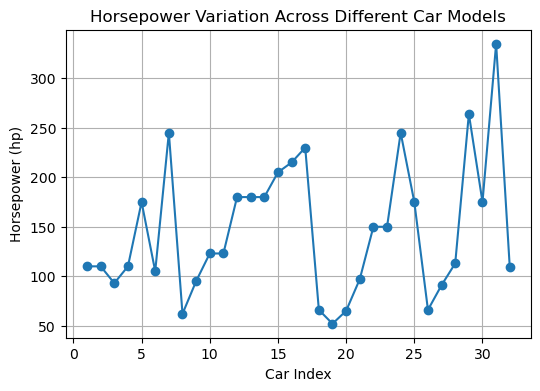

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Lenovo\Downloads\mtcars.csv")

plt.figure(figsize=(6,4))
plt.plot(range(1, len(df) + 1), df['hp'], marker='o', linestyle='-')
plt.xlabel('Car Index')
plt.ylabel('Horsepower (hp)')
plt.title('Horsepower Variation Across Different Car Models')
plt.grid(True)
plt.show()


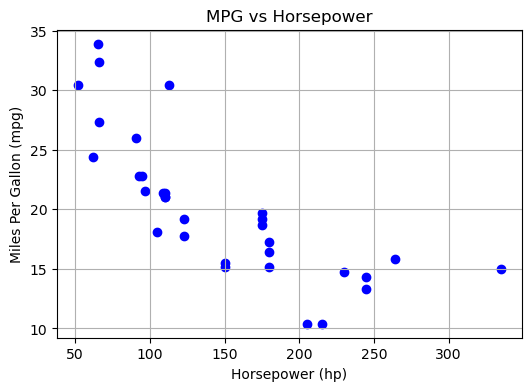

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(df['hp'], df['mpg'], color='b')
plt.xlabel('Horsepower (hp)')
plt.ylabel('Miles Per Gallon (mpg)')
plt.title('MPG vs Horsepower')
plt.grid(True)
plt.show()


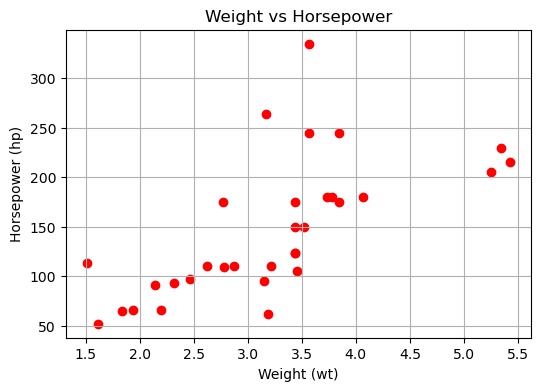

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(df['wt'], df['hp'], color='r')
plt.xlabel('Weight (wt)')
plt.ylabel('Horsepower (hp)')
plt.title('Weight vs Horsepower')
plt.grid(True)
plt.show()


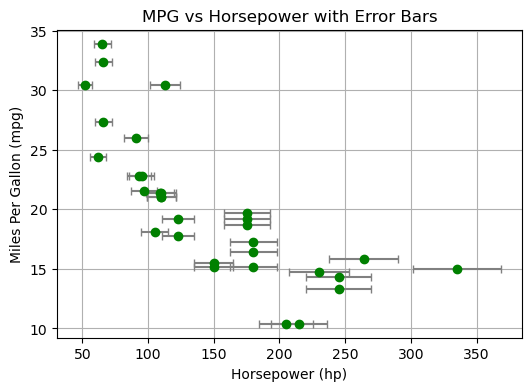

In [ ]:
import numpy as np

hp_error = df['hp'] * 0.1

plt.figure(figsize=(6, 4))
plt.errorbar(df['hp'], df['mpg'], xerr=hp_error, fmt='o', color='g', ecolor='gray', capsize=3)
plt.xlabel('Horsepower (hp)')
plt.ylabel('Miles Per Gallon (mpg)')
plt.title('MPG vs Horsepower with Error Bars')
plt.grid(True)
plt.show()


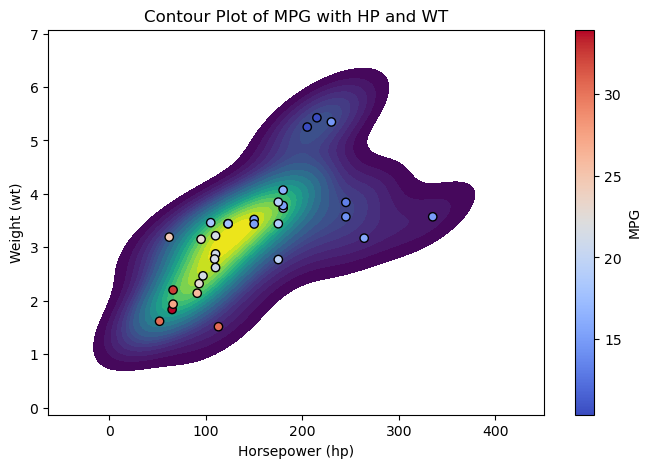

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.kdeplot(x=df['hp'], y=df['wt'], fill=True, levels=20, cmap="viridis")
plt.scatter(df['hp'], df['wt'], c=df['mpg'], cmap='coolwarm', edgecolors='k')
plt.colorbar(label='MPG')
plt.xlabel('Horsepower (hp)')
plt.ylabel('Weight (wt)')
plt.title('Contour Plot of MPG with HP and WT')
plt.show()


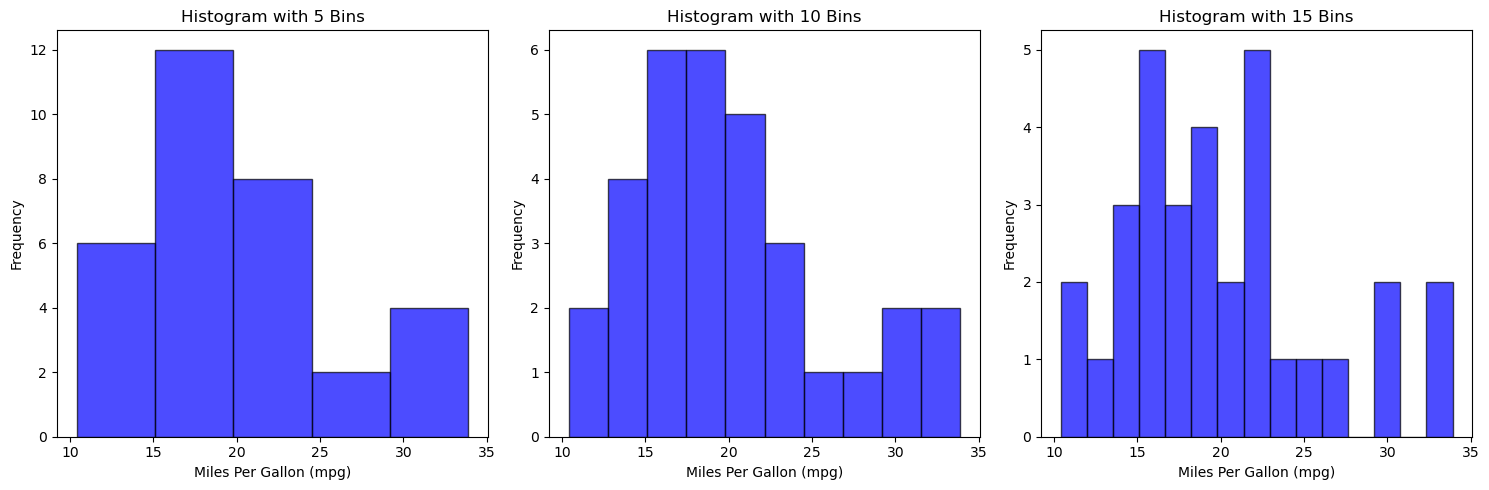

In [ ]:
plt.figure(figsize=(15, 5))

for i, bins in enumerate([5, 10, 15], 1):
    plt.subplot(1, 3, i)
    plt.hist(df['mpg'], bins=bins, color='b', alpha=0.7, edgecolor='black')
    plt.xlabel('Miles Per Gallon (mpg)')
    plt.ylabel('Frequency')
    plt.title(f'Histogram with {bins} Bins')

plt.tight_layout()
plt.show()


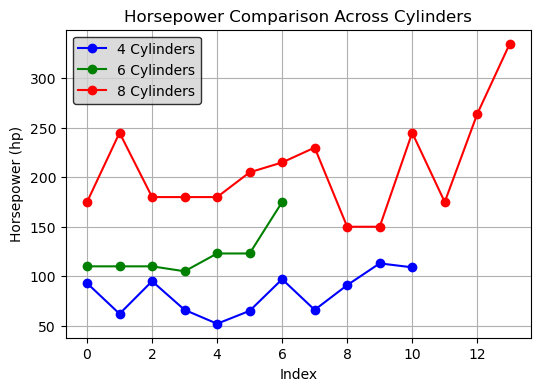

In [ ]:
plt.figure(figsize=(6,4))

for cyl, color in zip([4, 6, 8], ['b', 'g', 'r']):
    subset = df[df['cyl'] == cyl]
    plt.plot(range(len(subset)), subset['hp'], marker='o', linestyle='-', color=color, label=f'{cyl} Cylinders')

plt.xlabel('Index')
plt.ylabel('Horsepower (hp)')
plt.title('Horsepower Comparison Across Cylinders')
plt.legend(loc='upper left', fontsize=10, facecolor='lightgray', edgecolor='black')
plt.grid(True)
plt.show()


In [1]:
from google.colab import files
uploaded = files.upload()

Saving Video_Games_Sales_as_at_22_Dec_2016.csv to Video_Games_Sales_as_at_22_Dec_2016.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

In [4]:
df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Convert Year column to numeric and drop NaN values
df['Year_of_Release'] = pd.to_numeric(df['Year_of_Release'], errors='coerce')
df = df.dropna(subset=['Year_of_Release', 'Critic_Score', 'User_Score', 'Global_Sales', 'NA_Sales', 'EU_Sales'])


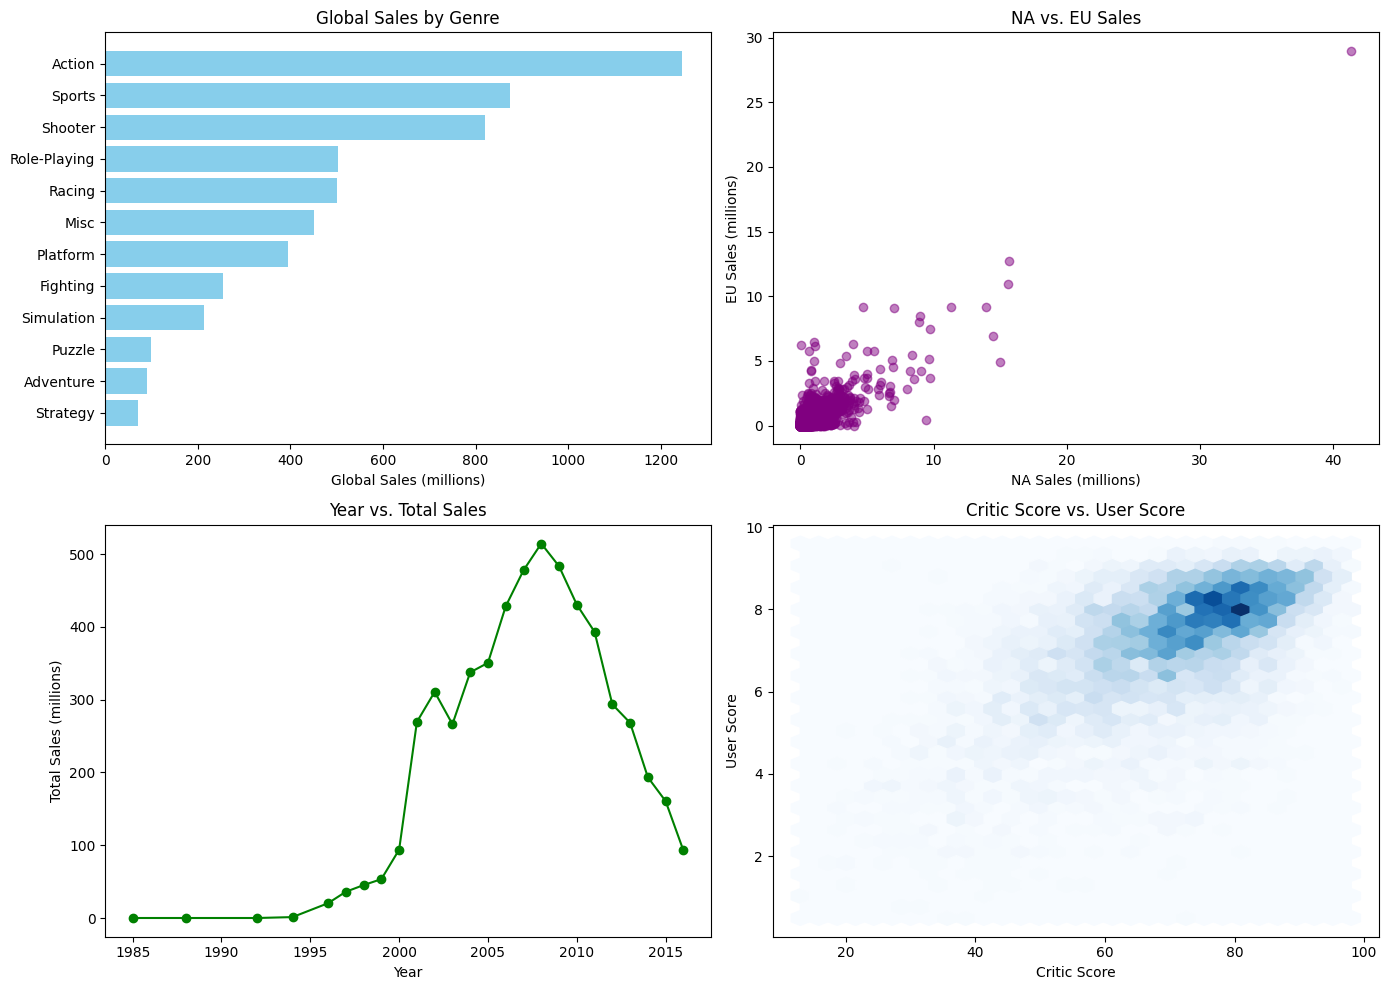

In [12]:
# Multiple Subplots (2x2)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# (a) Global Sales by Genre (Bar Plot)
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values()
axes[0, 0].barh(genre_sales.index, genre_sales.values, color='skyblue')
axes[0, 0].set_title("Global Sales by Genre")
axes[0, 0].set_xlabel("Global Sales (millions)")

# (b) NA vs. EU Sales (Scatter Plot)
axes[0, 1].scatter(df['NA_Sales'], df['EU_Sales'], alpha=0.5, color='purple')
axes[0, 1].set_title("NA vs. EU Sales")
axes[0, 1].set_xlabel("NA Sales (millions)")
axes[0, 1].set_ylabel("EU Sales (millions)")

# (c) Year vs. Total Sales (Line Plot)
year_sales = df.groupby('Year_of_Release')['Global_Sales'].sum()
axes[1, 0].plot(year_sales.index, year_sales.values, marker='o', linestyle='-', color='green')
axes[1, 0].set_title("Year vs. Total Sales")
axes[1, 0].set_xlabel("Year")
axes[1, 0].set_ylabel("Total Sales (millions)")

# (d) Critic Score vs. User Score (Hexbin Plot)
# Convert 'Critic_Score' and 'User_Score' to numeric, replacing 'tbd' with NaN
df['Critic_Score'] = pd.to_numeric(df['Critic_Score'], errors='coerce')
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

# Drop rows with NaN values in 'Critic_Score' and 'User_Score' for the hexbin plot
hexbin_data = df.dropna(subset=['Critic_Score', 'User_Score'])

hb = axes[1, 1].hexbin(hexbin_data['Critic_Score'], hexbin_data['User_Score'], gridsize=30, cmap='Blues')
axes[1, 1].set_title("Critic Score vs. User Score")
axes[1, 1].set_xlabel("Critic Score")
axes[1, 1].set_ylabel("User Score")

plt.tight_layout()
plt.show()

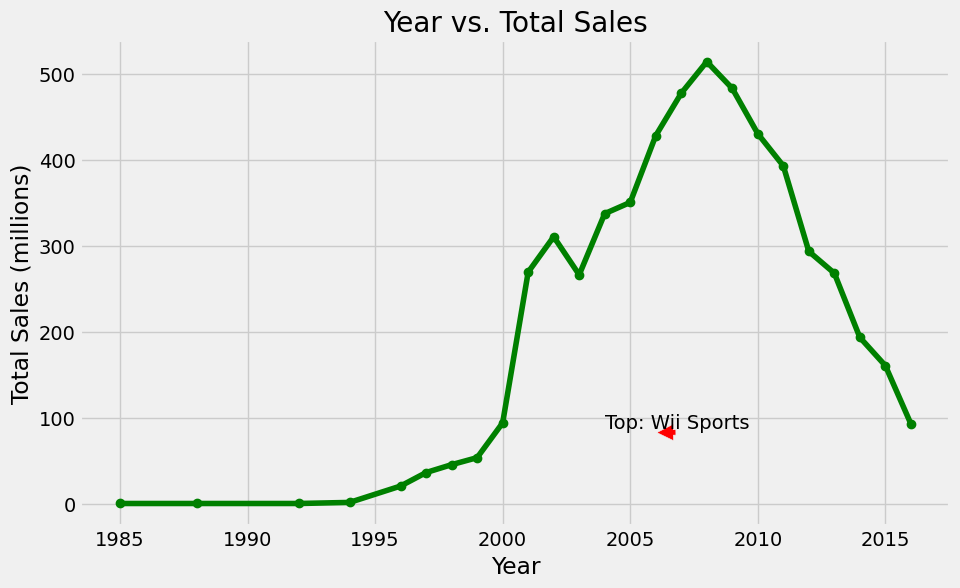

In [16]:
# Text and Annotation
fig, ax = plt.subplots(figsize=(10, 6))

# Line plot for Year vs. Total Sales
year_sales = df.groupby('Year_of_Release')['Global_Sales'].sum()
ax.plot(year_sales.index, year_sales.values, marker='o', linestyle='-', color='green')
ax.set_title("Year vs. Total Sales")
ax.set_xlabel("Year")
ax.set_ylabel("Total Sales (millions)")

# Annotate the top-selling game globally
top_game = df.loc[df['Global_Sales'].idxmax()]
ax.annotate(f"Top: {top_game['Name']}",
            xy=(top_game['Year_of_Release'], top_game['Global_Sales']),
            xytext=(top_game['Year_of_Release'] - 2, top_game['Global_Sales'] + 5),
            arrowprops=dict(facecolor='red', shrink=0.05))

# Highlight outliers (Low Critic Score but High Sales)
outliers = df[(df['Critic_Score'] < 40) & (df['Global_Sales'] > 5)]
for _, row in outliers.iterrows():
    ax.annotate(row['Name'],
                xy=(row['Year_of_Release'], row['Global_Sales']),
                xytext=(row['Year_of_Release'] + 1, row['Global_Sales'] + 2),
                arrowprops=dict(facecolor='orange', shrink=0.05))

# Show the updated plot with annotations
plt.show()


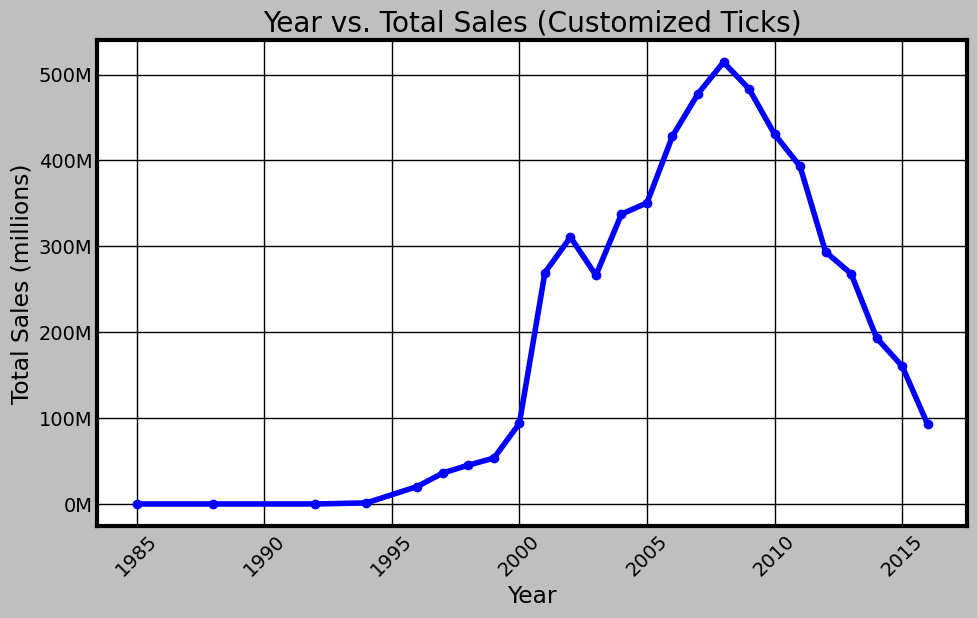

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Import Seaborn library
import matplotlib.ticker as mtick # Import the ticker module

fig, ax = plt.subplots(figsize=(10, 6))

# Re-plot Year vs. Total Sales
ax.plot(year_sales.index, year_sales.values, marker='o', linestyle='-', color='blue')
ax.set_title("Year vs. Total Sales (Customized Ticks)")
ax.set_xlabel("Year")
ax.set_ylabel("Total Sales (millions)")

# 4(a) Format Y-Axis in Millions
ax.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x)}M")) # Use mtick.FuncFormatter

# 4(b) Rotate X-Axis Labels for Readability
plt.xticks(rotation=45)

# Show plot
plt.show()

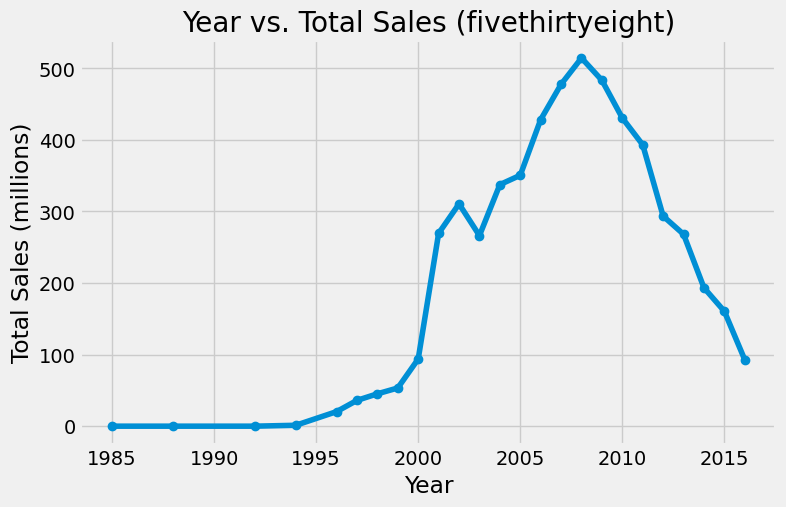

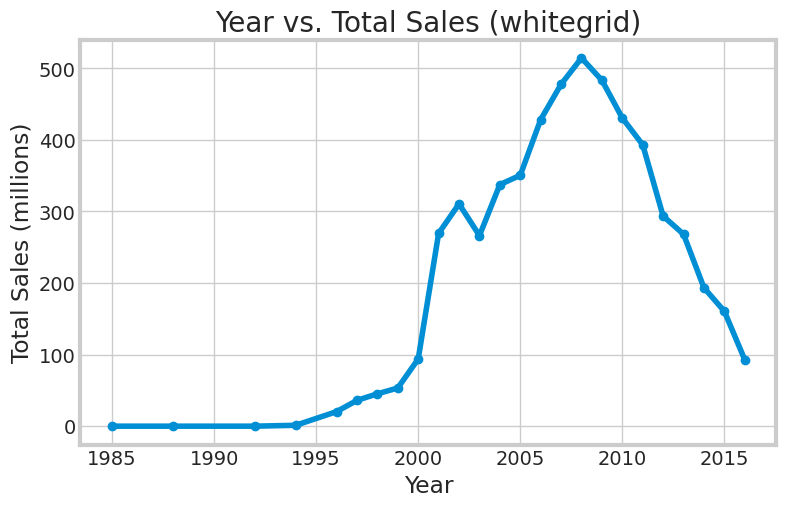

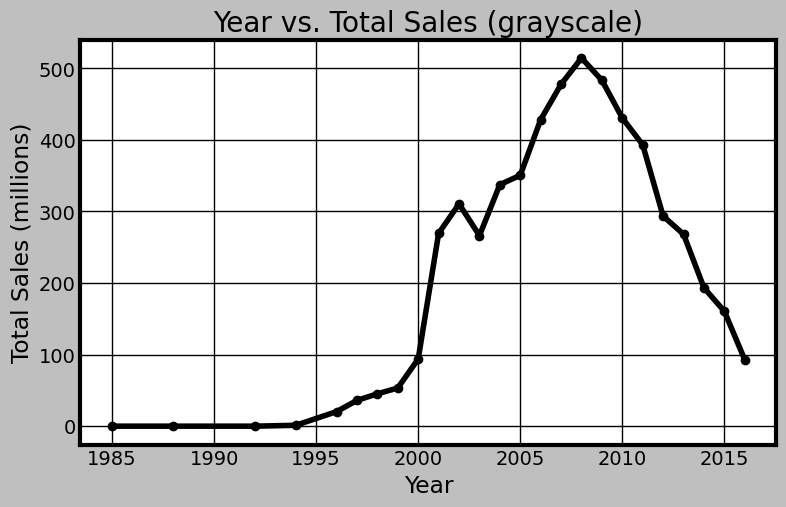

In [23]:
# Customizing Stylesheets
styles = ["fivethirtyeight", "whitegrid", "grayscale"]  # Changed "poster" to "whitegrid" for Seaborn compatibility
for style in styles:
    if style in ["whitegrid", "darkgrid", "white", "dark", "ticks"]: # Check if the style is valid for Seaborn
        sns.set_style(style)  # Set Seaborn style before plotting
    else:
        plt.style.use(style)  # Use Matplotlib style if not valid for Seaborn
    plt.figure(figsize=(8, 5))
    plt.plot(year_sales.index, year_sales.values, marker='o', linestyle='-')
    plt.title(f"Year vs. Total Sales ({style})")
    plt.xlabel("Year")
    plt.ylabel("Total Sales (millions)")
    plt.show()

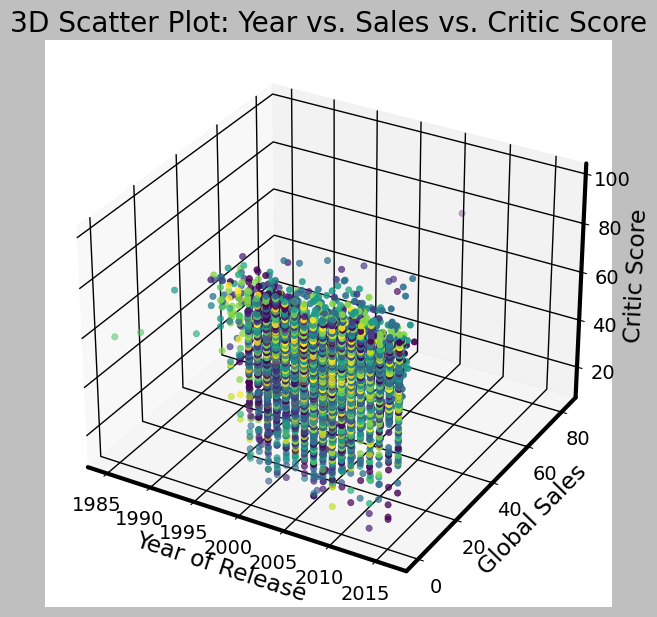

In [19]:
# Three-Dimensional Plots
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Year_of_Release'], df['Global_Sales'], df['Critic_Score'], c=pd.factorize(df['Genre'])[0], cmap='viridis')
ax.set_xlabel('Year of Release')
ax.set_ylabel('Global Sales')
ax.set_zlabel('Critic Score')
plt.title("3D Scatter Plot: Year vs. Sales vs. Critic Score")
plt.show()

# Geographic Data Visualization
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
region_sales.columns = ['Region', 'Sales']
fig = px.choropleth(region_sales, locations=['USA', 'Europe', 'Japan', 'Other'],
                    locationmode='country names', color='Sales',
                    title="Total Sales per Region", color_continuous_scale="Blues")
fig.show()